# Classification Regression Using Keras

## Reading Data and ETL

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

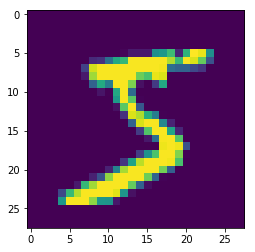

In [5]:
plt.imshow(X_train[0])

In [6]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


# Build a Neural Network

In [11]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 153s - loss: 0.2039 - acc: 0.9384 - val_loss: 0.0914 - val_acc: 0.9702
Epoch 2/10
 - 147s - loss: 0.0798 - acc: 0.9752 - val_loss: 0.1010 - val_acc: 0.9692
Epoch 3/10
 - 75s - loss: 0.0543 - acc: 0.9829 - val_loss: 0.0818 - val_acc: 0.9737
Epoch 4/10
 - 71s - loss: 0.0416 - acc: 0.9866 - val_loss: 0.0822 - val_acc: 0.9751
Epoch 5/10
 - 72s - loss: 0.0313 - acc: 0.9900 - val_loss: 0.0823 - val_acc: 0.9768
Epoch 6/10
 - 81s - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0733 - val_acc: 0.9796
Epoch 7/10
 - 115s - loss: 0.0220 - acc: 0.9925 - val_loss: 0.0839 - val_acc: 0.9782
Epoch 8/10
 - 181s - loss: 0.0202 - acc: 0.9935 - val_loss: 0.0744 - val_acc: 0.9830
Epoch 9/10
 - 175s - loss: 0.0172 - acc: 0.9943 - val_loss: 0.0798 - val_acc: 0.9820
Epoch 10/10
 - 265s - loss: 0.0144 - acc: 0.9952 - val_loss: 0.0890 - val_acc: 0.9803


In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9803% 
 Error: 0.01970000000000005


In [14]:
model.save('classification_model.h5')

In [15]:
from keras.models import load_model

In [16]:
pretrained_model = load_model('classification_model.h5')